# K-Means Clustering on Fall Out Boy

## Import Libraries

In [1]:
import pandas as pd
from pathlib import Path
import librosa
import IPython.display as ipd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl

## Import Audio

In [2]:
audio_files = []

import os
for root, dirs, files in os.walk('../../../Music/FOB'):
    for file in files:
        if file.endswith(".wav"):
             audio_files.append(os.path.join(root, file))

audio = [librosa.load(i) for i in audio_files]

### Extract Features

In [3]:
def extract_features(signal):
    return [
#         librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(signal)[0, 0],
#         librosa.feature.mfcc(signal)[0,0],
        librosa.feature.spectral_rolloff(signal)[0,0],
        librosa.feature.spectral_contrast(signal)[0,0],
        librosa.feature.spectral_flatness(signal)[0,0],
#         librosa.feature.rms(signal)[0,0],
#         librosa.feature.tonnetz(signal)[0,0]
    ]

In [4]:
X = pd.DataFrame([extract_features(audio[x][0]) for x in range(len(audio))])

### Feature Scale

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Elbow Method for Optimal Number of Clusters

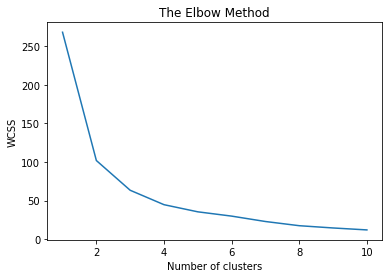

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Use K-Means Clustering

In [7]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

## Evaluate and Visualize

Text(0.5, 0.98, 'Fall Out Boy Songs \nClustered by Spectral Features')

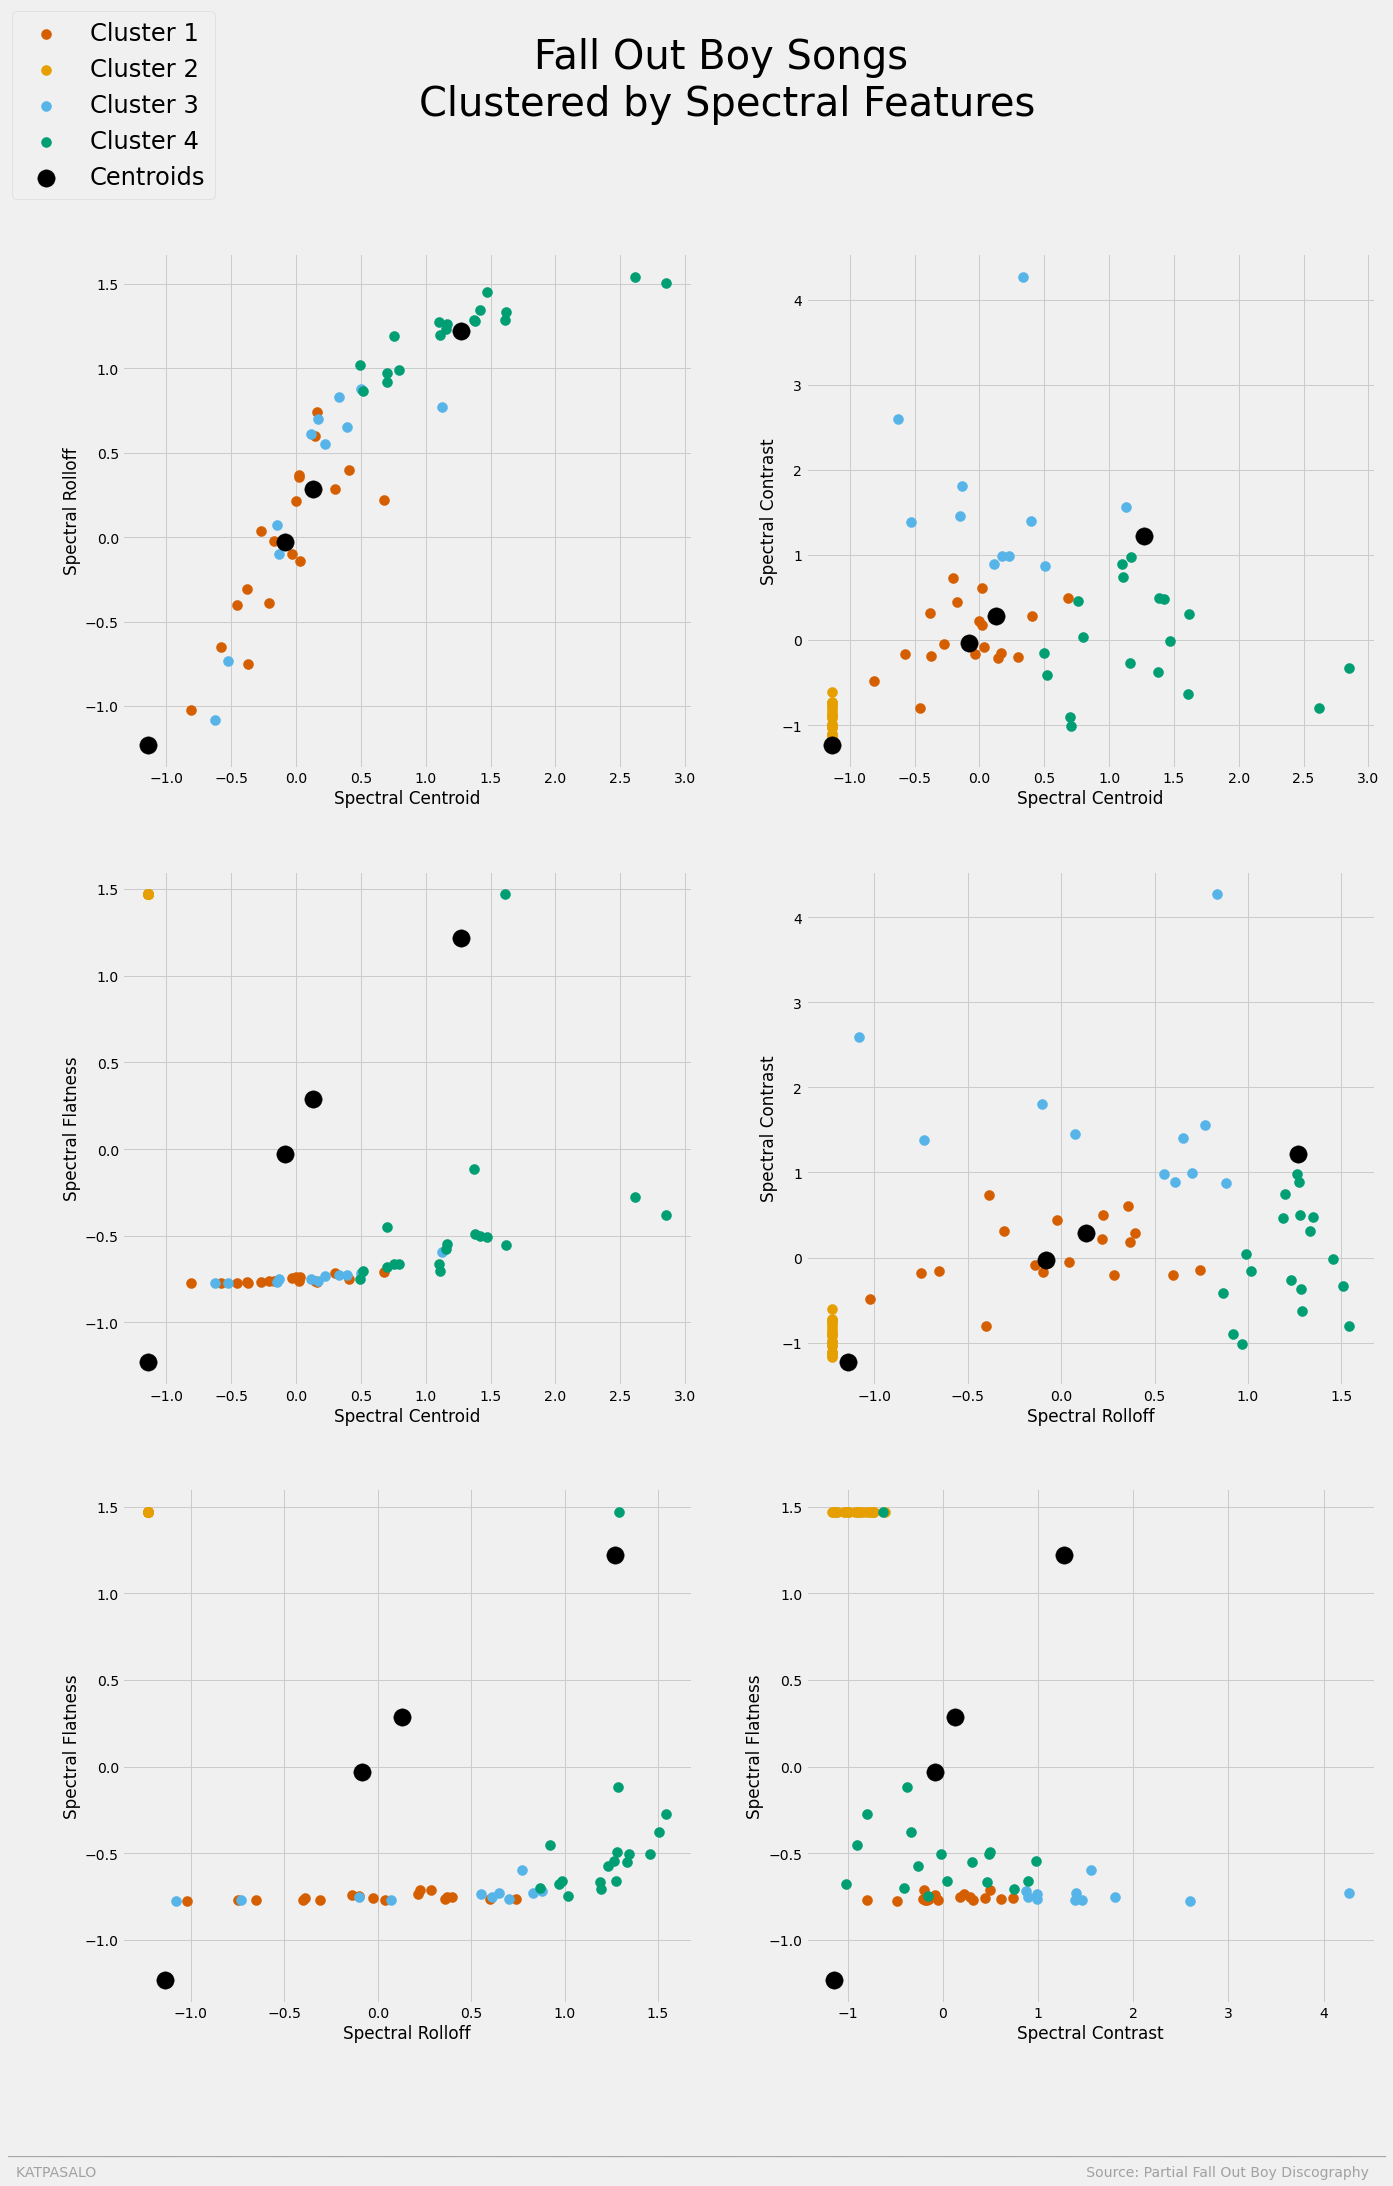

In [19]:
mpl.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 30)
fig, ax = plt.subplots(nrows=3, ncols=2)

# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

ax[0][0].scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, color = colors[4], label = 'Cluster 1')
ax[0][0].scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, color = colors[1], label = 'Cluster 2')
ax[0][0].scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, color = colors[2], label = 'Cluster 3')
ax[0][0].scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, color = colors[3], label = 'Cluster 4')
ax[0][0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, color = colors[0], label = 'Centroids')
# ax[0][0].set(title='Clusters of customers')
ax[0][0].set_xlabel('Spectral Centroid')
ax[0][0].set_ylabel('Spectral Rolloff')

ax[0][1].scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 2], s = 100, color = colors[4], label = 'Cluster 1')
ax[0][1].scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 2], s = 100, color = colors[1], label = 'Cluster 2')
ax[0][1].scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 2], s = 100, color = colors[2], label = 'Cluster 3')
ax[0][1].scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 2], s = 100, color = colors[3], label = 'Cluster 4')
ax[0][1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, color = colors[0], label = 'Centroids')
# ax[0][1].set(title='Clusters of customers')
ax[0][1].set_xlabel('Spectral Centroid')
ax[0][1].set_ylabel('Spectral Contrast')

ax[1][0].scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 3], s = 100, color = colors[4], label = 'Cluster 1')
ax[1][0].scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 3], s = 100, color = colors[1], label = 'Cluster 2')
ax[1][0].scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 3], s = 100, color = colors[2], label = 'Cluster 3')
ax[1][0].scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 3], s = 100, color = colors[3], label = 'Cluster 4')
ax[1][0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, color = colors[0], label = 'Centroids')
# ax[1][0].set(title='Clusters of customers')
ax[1][0].set_xlabel('Spectral Centroid')
ax[1][0].set_ylabel('Spectral Flatness')

ax[1][1].scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 100, color = colors[4], label = 'Cluster 1')
ax[1][1].scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 100, color = colors[1], label = 'Cluster 2')
ax[1][1].scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 100, color = colors[2], label = 'Cluster 3')
ax[1][1].scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s = 100, color = colors[3], label = 'Cluster 4')
ax[1][1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, color = colors[0], label = 'Centroids')
# ax[1][1].set(title='Clusters of customers')
ax[1][1].set_xlabel('Spectral Rolloff')
ax[1][1].set_ylabel('Spectral Contrast')

ax[2][0].scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 3], s = 100, color = colors[4], label = 'Cluster 1')
ax[2][0].scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 3], s = 100, color = colors[1], label = 'Cluster 2')
ax[2][0].scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 3], s = 100, color = colors[2], label = 'Cluster 3')
ax[2][0].scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 3], s = 100, color = colors[3], label = 'Cluster 4')
ax[2][0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, color = colors[0], label = 'Centroids')
# ax[2][0].set(title='Clusters of customers')
ax[2][0].set_xlabel('Spectral Rolloff')
ax[2][0].set_ylabel('Spectral Flatness')

ax[2][1].scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 100, color = colors[4], label = 'Cluster 1')
ax[2][1].scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 100, color = colors[1], label = 'Cluster 2')
ax[2][1].scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s = 100, color = colors[2], label = 'Cluster 3')
ax[2][1].scatter(X[y_kmeans == 3, 2], X[y_kmeans == 3, 3], s = 100, color = colors[3], label = 'Cluster 4')
ax[2][1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, color = colors[0], label = 'Centroids')
# ax[2][1].set(title='Clusters of customers')
ax[2][1].set_xlabel('Spectral Contrast')
ax[2][1].set_ylabel('Spectral Flatness')

# Add signature bar
fig.text(x = 0, y = 0,
        s = '_____________________________________________________________________________________________________________________________________________________________________________________________________',
        color = 'grey', alpha = .7)
fig.text(x = 0, y = -.01,
        s = '  KATPASALO                                                                                                                                                                                                                            Source: Partial Fall Out Boy Discography', 
        fontsize = 14, color = 'grey', alpha = .7)


handles, labels = ax[2][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', fontsize='xx-large')
fig.suptitle('Fall Out Boy Songs \nClustered by Spectral Features', fontsize=40)